## Import Required Libraries

In [32]:
import numpy as np
import pandas as pd

import librosa
import cv2

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import os

from tqdm import tqdm

from constants import *

## Data Inspection

In [2]:
df=pd.read_csv(ROOT_PATH_SOUND_DATASET_CSV)

In [3]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
print(f"The shape of the dataframe : {df.shape}")

The shape of the dataframe : (8732, 8)


In [5]:
df.iloc[0]["slice_file_name"]

'100032-3-0-0.wav'

In [6]:
def create_random_example_data_path():
    random_idx=np.random.randint(0,df.shape[0])
    example_sound_path=ROOT_PATH_SOUND_DATASET+"fold"+str(df.iloc[random_idx]["fold"])+"\\"+df.iloc[random_idx]["slice_file_name"]
    clsId=df.iloc[random_idx]["classID"]
    return example_sound_path , clsId

In [7]:
def create_by_specific_index_example_data_path(index:int):
    example_sound_path=ROOT_PATH_SOUND_DATASET+"fold"+str(df.iloc[index]["fold"])+"\\"+df.iloc[index]["slice_file_name"]
    clsId=df.iloc[index]["classID"]
    return example_sound_path , clsId
    

In [8]:
create_random_example_data_path()

('C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold9\\94182-9-0-9.wav',
 9)

In [9]:
create_by_specific_index_example_data_path(5)

('C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold5\\100263-2-0-143.wav',
 2)

In [10]:
df["classID"].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4], dtype=int64)

In [11]:
df["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [12]:
id2cls={
    0:"air_conditioner",
    1:"car_horn",
    2:"children_playing",
    3:"dog_bark",
    4:"drilling",
    5:"engine_idling",
    6:"gun_shot",
    7:"jackhammer",
    8:"siren",
    9:"street_music"
}

### Visualization of Sound Waves

In [13]:
def visualize_sounds(sound_path:str, clsId:int):
    """This function provides to visualize wave visualization from given sound_path and class id parameters.

    Args:
        sound_path (str): Specific sound path to visualize
        clsId (int): Class id
    """
    x,sr=librosa.load(sound_path)
    fig,axs=plt.subplots(nrows=1,ncols=1,sharex=True)
    librosa.display.waveshow(x, sr=sr,ax=axs)
    axs.set_title(f"Example audio wave visualization of class: {id2cls[clsId]}")
    

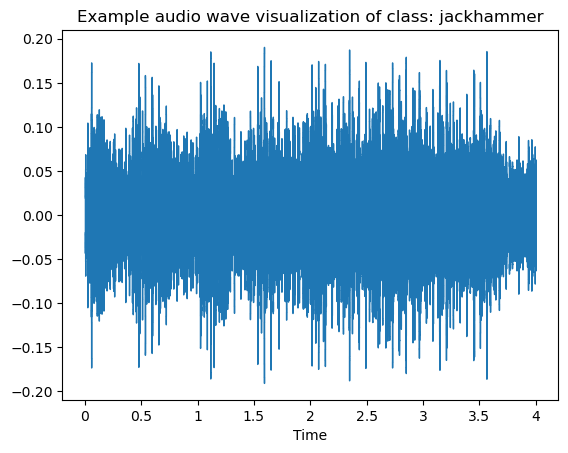

In [16]:
random_path, random_clsId=create_random_example_data_path()
visualize_sounds(random_path,random_clsId)

### Create Spectogram

In [17]:
def create_spectrogram(y):
    spec=librosa.feature.melspectrogram(y=y)
    spec_conv=librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

### Save Sound Wave Images 

In [218]:
def save_sound_wave(sound_path):
    x,sr=librosa.load(sound_path)
    converted_audio=create_spectrogram(x)
    fig=plt.Figure()
    canvas=FigureCanvas(fig)
    plt.margins(0,0)
    ax=fig.add_subplot(111)
    p = librosa.display.specshow(converted_audio, ax=ax, sr=sr)
    
    output_dir = "C:\\Users\\MSI\\Documents\\GitHub\\Urban_Sound_Classification_GlobalAiHub_KocHolding_FinalProject\\converted_audio"
    os.makedirs(output_dir, exist_ok=True)
    
    # Generate a new file path for saving the image
    base_name = os.path.splitext(os.path.basename(sound_path))[0]
    output_file = os.path.join(output_dir, base_name + ".png")
    
    fig.savefig(output_file, bbox_inches='tight', pad_inches=0.0)
    plt.close(fig)
  
     

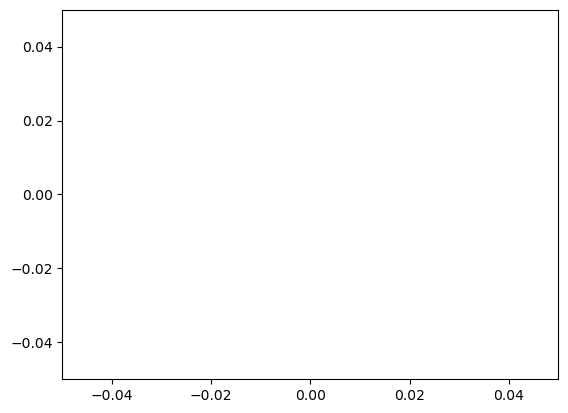

In [219]:
save_sound_wave(create_by_specific_index_example_data_path(10)[0])

## Creating Path of Sound Lists

In [197]:
all_audio_sounds_path=[]
all_audio_sounds_label=[]
for index,row in tqdm(df.iterrows()):
    path,classId=create_by_specific_index_example_data_path(index)
    all_audio_sounds_path.append(path)
    all_audio_sounds_label.append(classId)

8732it [00:00, 11212.51it/s]


In [200]:
all_audio_sounds_path[0:5]

['C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold5\\100032-3-0-0.wav',
 'C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav',
 'C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold5\\100263-2-0-121.wav',
 'C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold5\\100263-2-0-126.wav',
 'C:\\Users\\MSI\\Desktop\\urban_sound_dataset\\UrbanSound8K\\audio\\fold5\\100263-2-0-137.wav']

In [220]:
all_audio_sounds_label[0:5]

[3, 2, 2, 2, 2]

## Convert All Of The Sound Files into Spectogram Images

Processing audio files:  41%|████      | 3554/8732 [02:45<06:30, 13.25it/s]c:\Users\MSI\anaconda3\envs\urban_sound\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
Processing audio files:  95%|█████████▌| 8325/8732 [07:08<00:15, 25.66it/s]c:\Users\MSI\anaconda3\envs\urban_sound\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
Processing audio files:  95%|█████████▌| 8329/8732 [07:08<00:14, 28.17it/s]c:\Users\MSI\anaconda3\envs\urban_sound\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
Processing audio files: 100%|██████████| 8732/8732 [07:26<00:00, 19.57it/s]


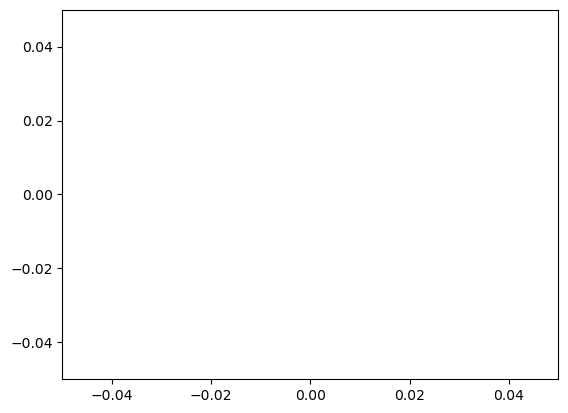

In [221]:
for audio_path in tqdm(all_audio_sounds_path, desc="Processing audio files"):
    save_sound_wave(audio_path)

In [27]:
list_of_spec_images=os.listdir('converted_audio')

In [28]:
list_of_spec_images=[CONVERTED_SOUND_IMAGES_PATH+"\\"+path for path in list_of_spec_images]

In [29]:
labels=[int(path.split("-")[1]) for path in list_of_spec_images]

In [30]:
list_of_spec_images[0:5]

['C:\\Users\\MSI\\Documents\\GitHub\\Urban_Sound_Classification_GlobalAiHub_KocHolding_FinalProject\\converted_audio\\100032-3-0-0.png',
 'C:\\Users\\MSI\\Documents\\GitHub\\Urban_Sound_Classification_GlobalAiHub_KocHolding_FinalProject\\converted_audio\\100263-2-0-117.png',
 'C:\\Users\\MSI\\Documents\\GitHub\\Urban_Sound_Classification_GlobalAiHub_KocHolding_FinalProject\\converted_audio\\100263-2-0-121.png',
 'C:\\Users\\MSI\\Documents\\GitHub\\Urban_Sound_Classification_GlobalAiHub_KocHolding_FinalProject\\converted_audio\\100263-2-0-126.png',
 'C:\\Users\\MSI\\Documents\\GitHub\\Urban_Sound_Classification_GlobalAiHub_KocHolding_FinalProject\\converted_audio\\100263-2-0-137.png']

In [31]:
labels[0:5]

[3, 2, 2, 2, 2]

## Preprocess Images

In [ ]:
def preprocessing(image_path:str):
    # Read Image
    # Convert into grayscale format
    # Normalize it
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image    
    